### Imports

In [1]:
# If updates on imported files aren't detected, restart the kernel (we'll need to find an automatic solution for this)

import numpy as np
from icecream import ic

from typing import List, Tuple, Dict


### Evolution Helper

In [2]:
import random
from typing import List
from gxgp.node import Node
from utils.operations_dict import basic_function_set, complex_function_set

### Tree Generation

In [3]:
def generate_random_tree(max_height: int, pc: float, terminal_list: List[str],
                         constants: list[float] = None, p_pick_constant: float = 0.2, p_cut_tree: float = 0.2,
                         verbose: bool = False, cur_depth: int = 0) -> Node:
    """
    Generate a random symbolic expression tree.

    Mandatory Parameters
    ----------
    max_height : int
        The maximum height of the tree. The height of a tree is the length of the longest path from the root to a leaf (e.g. height of a leaf is 0).
    pc : float
        The probability of choosing a complex function over a basic function.
    terminal_list : List[str]
        The terminal list to choose from. Example: ['x0', 'x1', 'x2']

    Optional Parameters
    ----------
    constants : list[float]
        A list of constants that can be used in the tree (default is None).
    p_pick_constant : float
        The probability of choosing a constant over a terminal (default is 0.2).
    p_cut_tree : float
        The probability of cutting the tree early (default is 0.2).    
    verbose : bool    
        Whether to print debug information (default is False).
    cur_depth : int
        The exploration depth (e.g. depth of root is 0)

    Returns
    -------
    Node
        A Node object representing the root of the tree.
    """
    indent = ' ' * (cur_depth * 2)

    # Cut the tree early with probability 0.2
    if (random.random() < p_cut_tree) or max_height == 0:  
        # If constants are provided, choose one with probability p_pick_constant
        if constants is not None and random.random() < p_pick_constant: 
            terminal = random.choice(constants) 
        # Otherwise, pick from the terminal set
        else:                                                
            terminal = random.choice(terminal_list)
        
        if verbose: print(f"{indent}Picked terminal: {terminal}")

        # Set the height of the node to 0
        my_node = Node(terminal)
        my_node.set_height(0)
        return my_node
    else:
        # Choose a complex function with probability pc
        if random.random() < pc:                       
            func = random.choice(list(complex_function_set.keys()))
            if verbose: print(f"{indent}Chose complex function {func}")
            num_children = complex_function_set[func].__code__.co_argcount  # Numero di argomenti della funzione
            children = [generate_random_tree(max_height - 1, pc, terminal_list, constants, p_pick_constant, p_cut_tree, verbose, cur_depth + 1)
                        for _ in range(num_children)]
            
            # Set height
            cur_height = max([child.get_height() for child in children]) + 1
            my_node = Node(complex_function_set[func], children, name=func)
            my_node.set_height(cur_height)
            return my_node
        # Otherwise, choose a basic function
        else:                                           
            func = random.choice(list(basic_function_set.keys()))
            if verbose: print(f"{indent}Chose basic function {func}")
            num_children = basic_function_set[func].__code__.co_argcount  # Numero di argomenti della funzione
            children = [generate_random_tree(max_height - 1, pc, terminal_list, constants, p_pick_constant, p_cut_tree, verbose, cur_depth + 1)
                        for _ in range(num_children)]
            # Set height
            cur_height = max([child.get_height() for child in children]) + 1
            my_node = Node(basic_function_set[func], children, name=func)
            my_node.set_height(cur_height)
            return my_node

def generate_random_tree_with_all_terminal(max_height: int, pc: float, terminal_list: List[str],
                         constants: list[float] = None, p_pick_constant: float = 0.2, p_cut_tree: float = 0.2,
                         verbose: bool = False, cur_depth: int = 0, picked_terminal: set[str]=set()) -> Node:
    """
    Generate a random symbolic expression tree.

    Mandatory Parameters
    ----------
    max_height : int
        The maximum height of the tree. The height of a tree is the length of the longest path from the root to a leaf (e.g. height of a leaf is 0).
    pc : float
        The probability of choosing a complex function over a basic function.
    terminal_list : List[str]
        The terminal list to choose from. Example: ['x0', 'x1', 'x2']

    Optional Parameters
    ----------
    constants : list[float]
        A list of constants that can be used in the tree (default is None).
    p_pick_constant : float
        The probability of choosing a constant over a terminal (default is 0.2).
    p_cut_tree : float
        The probability of cutting the tree early (default is 0.2).    
    verbose : bool    
        Whether to print debug information (default is False).
    cur_depth : int
        The exploration depth (e.g. depth of root is 0)

    Returns
    -------
    Node
        A Node object representing the root of the tree.
    """
    indent = ' ' * (cur_depth * 2)

    # Cut the tree early with probability 0.2
    if (random.random() < p_cut_tree) or max_height == 0:  
        # If constants are provided, choose one with probability p_pick_constant
        if constants is not None and random.random() < p_pick_constant and len(picked_terminal) == len(terminal_list): 
            terminal = random.choice(constants) 
        # Otherwise, pick from the terminal set
        else:                                                
            terminal = random.choice(terminal_list)
            picked_terminal.add(terminal)
        
        if verbose: print(f"{indent}Picked terminal: {terminal}")

        # Set the height of the node to 0
        my_node = Node(terminal)
        my_node.set_height(0)
        return my_node
    else:
        # Choose a complex function with probability pc
        if random.random() < pc:                       
            func = random.choice(list(complex_function_set.keys()))
            if verbose: print(f"{indent}Chose complex function {func}")
            num_children = complex_function_set[func].__code__.co_argcount  # Numero di argomenti della funzione
            children = [generate_random_tree_with_all_terminal(max_height - 1, pc, terminal_list, constants, p_pick_constant, p_cut_tree, verbose, cur_depth + 1,picked_terminal)
                        for _ in range(num_children)]
            
            # Set height
            cur_height = max([child.get_height() for child in children]) + 1
            my_node = Node(complex_function_set[func], children, name=func)
            my_node.set_height(cur_height)
            return my_node
        # Otherwise, choose a basic function
        else:                                           
            func = random.choice(list(basic_function_set.keys()))
            if verbose: print(f"{indent}Chose basic function {func}")
            num_children = basic_function_set[func].__code__.co_argcount  # Numero di argomenti della funzione
            children = [generate_random_tree_with_all_terminal(max_height - 1, pc, terminal_list, constants, p_pick_constant, p_cut_tree, verbose, cur_depth + 1,picked_terminal)
                        for _ in range(num_children)]
            # Set height
            cur_height = max([child.get_height() for child in children]) + 1
            my_node = Node(basic_function_set[func], children, name=func)
            my_node.set_height(cur_height)
            return my_node

### Mutations

In [4]:
def point_mutation(Tree: Node, terminal_list: List[str], constants: list[float] = None, p_pick_constant: float = 0.2, pc: float = 0.2) -> Node:
    """
    Mutate a tree by changing a random node to a new random node.

    Parameters
    ----------
    Tree : Node
        The tree to mutate.
    terminal_list : List[str]
        The terminal list to choose from. Example: ['x0', 'x1', 'x2']
    constants : list[float]
        A list of constants that can be used in the tree.
    p_pick_constant : float
        The probability of choosing a constant over a terminal.
    pc : float
        The probability of choosing a complex function over a basic function.

    Returns
    -------
    Node
        The mutated tree.
    """

    # Get the list of nodes in the tree
    node = Tree.get_random_node()

    # If the node is a terminal, change it to a new terminal
    if node.is_leaf:
        if constants is not None and random.random() < p_pick_constant:
            terminal = random.choice(constants)
        else:
            terminal = random.choice(terminal_list)
        node.set_func(terminal)
        return Tree
    # Otherwise, change it to a new function maintaining the arity
    else:
        if random.random() < pc:
            while True:
                func = random.choice(list(complex_function_set.keys()))
                arity = complex_function_set[func].__code__.co_argcount
                if arity == node._arity:
                    break
            node.set_func(complex_function_set[func], name=func)
        else:
            while True:
                func = random.choice(list(basic_function_set.keys()))
                arity = basic_function_set[func].__code__.co_argcount
                if arity == node._arity:
                    break
            node.set_func(basic_function_set[func], name=func)
        return Tree
    
def subtree_mutation(Tree: Node, terminal_list: List[str], constants: list[float] = None, p_pick_constant: float = 0.2, pc: float = 0.2, height: int = 3, verbose: bool = False) -> Node:
    """
    Mutate a tree by changing a random subtree to a new random subtree.

    Parameters
    ----------
    Tree : Node
        The tree to mutate.
    terminal_list : List[str]
        The terminal list to choose from. Example: ['x0', 'x1', 'x2']
    constants : list[float]
        A list of constants that can be used in the tree.
    p_pick_constant : float
        The probability of choosing a constant over a terminal.
    pc : float
        The probability of choosing a complex function over a basic function.
    height : int
        The maximum height of the new subtree.

    Returns
    -------
    Node
        The mutated tree.
    """

    # Get the list of nodes in the tree
    node = Tree.get_random_node()

    if verbose:
        print(f"Node to mutate: {node._str} at height {node._height}")

    new_subtree = generate_random_tree(height, pc, terminal_list, constants, p_pick_constant)
    node = node.replace_tree_shallow(new_subtree)
    return Tree

def expansion_mutation(Tree: Node, terminal_list: List[str], constants: list[float] = None, p_pick_constant: float = 0.2, pc: float = 0.2, height: int = 3, verbose: bool = False) -> Node:
    """
    Mutate a tree by expanding a random node to a new random subtree.

    Parameters
    ----------
    Tree : Node
        The tree to mutate.
    terminal_list : List[str]
        The terminal list to choose from. Example: ['x0', 'x1', 'x2']
    constants : list[float]
        A list of constants that can be used in the tree.
    p_pick_constant : float
        The probability of choosing a constant over a terminal.
    pc : float
        The probability of choosing a complex function over a basic function.
    height : int
        The maximum height of the new subtree.

    Returns
    -------
    Node
        The mutated tree.
    """
    # Get the list of nodes in the tree
    node = random.choice(Tree.get_leafs())

    if verbose:
        print(f"Node to mutate: {node._str} at height {node._height}")  
    
    
    new_subtree = generate_random_tree(height, pc, terminal_list, constants, p_pick_constant)
    node = node.replace_tree_shallow(new_subtree)
    return Tree

def collaps_mutation(Tree: Node, terminal_list: List[str], constants: list[float] = None, p_pick_constant: float = 0.2, pc: float = 0.2, verbose: bool = False) -> Node:
    """
    Mutate a tree by collapsing a random node to a terminal.

    Parameters
    ----------
    Tree : Node
        The tree to mutate.
    terminal_list : List[str]
        The terminal list to choose from. Example: ['x0', 'x1', 'x2']
    constants : list[float]
        A list of constants that can be used in the tree.
    p_pick_constant : float
        The probability of choosing a constant over a terminal.
    pc : float
        The probability of choosing a complex function over a basic function.

    Returns
    -------
    Node
        The mutated tree.
    """

    # Get the list of nodes in the tree
    node = Tree.get_random_node()

    if verbose:
        print(f"Node to mutate: {node._str} at height {node._height}")

   # possible choices
    possible_choices = node.get_leafs()


    node.replace_tree_shallow(random.choice(possible_choices))
    return Tree


def permutation_mutation(Tree: Node, terminal_list: List[str], constants: list[float] = None, p_pick_constant: float = 0.2, pc: float = 0.2,verbose: bool = False) -> Node:
    """
    Mutate a tree by permuting the children of a random node through a rotation.

    Parameters
    ----------
    Tree : Node
        The tree to mutate.

    Returns
    -------
    Node
        The mutated tree.
    """

    # Extract a random node that has at least two children (so no leaves and single input functions)
    found = False
    for i in range(20):
        father = Tree.get_random_node()
        if father._arity > 1:
            found = True
            break
    if not found:
        return Tree
    
    if verbose:
        print(f"Father node: {father._str} at height {father._height}. It has {len(father._successors)} children: [", end="")
        for i, child in enumerate(father._successors):
            print(f"{child._str},", end=" ")
        print("]")

    
    new_successors = ()
    for i, child in enumerate(father._successors):
        new_successors = new_successors + (father._successors[i-1],)

    father._successors = new_successors

    if verbose:
        print(f"New children: [", end="")
        for i, child in enumerate(father._successors):
            print(f"{child._str},", end=" ")
        print("]")

    return Tree

def hoist_mutation(Tree: Node, terminal_list: List[str], constants: list[float] = None, p_pick_constant: float = 0.2, pc: float = 0.2,verbose: bool = False) -> Node:
    """
    Mutate a tree by replacing the root with a random child.

    Parameters
    ----------
    Tree : Node
        The tree to mutate.

    Returns
    -------
    Node
        The mutated tree.
    """

    random_node = Tree.get_random_node()
    return random_node

### crossover

In [5]:
def recombination_crossover(Tree1: Node, Tree2: Node, verbose: bool = False) -> Tuple[Node, Node]:
    """
    Recombine two trees by swapping a random subtree.

    Parameters
    ----------
    Tree1 : Node
        The first tree.
    Tree2 : Node
        The second tree.

    Returns
    -------
    Tuple[Node, Node]
        The recombined trees.
    """

    # Get the list of nodes in the trees
    node1 = Tree1.get_random_node()
    node2 = Tree2.get_random_node()

    if verbose:
        print(f"Node1 to swap: {node1._str} at height {node1._height}")
        print(f"Node2 to swap: {node2._str} at height {node2._height}")

    # Swap the subtrees
    temp1 = node1.clone()
    temp2 = node2.clone()
    node1.replace_tree_shallow(temp2)
    node2.replace_tree_shallow(temp1)

    return Tree1, Tree2



### Load Data

In [6]:
from gxgp import Node
problem_number = 8
problem = np.load(f'./data/problem_{problem_number}.npz')
input = problem['x']
labels = problem['y']

print("Input shape:", input.shape, " Example of sample: ", input[:, 0])
print("Labels shape:", labels.shape, " Example of label: ", labels[0])

# Terminal set
terminal_list = ['x' + str(i) for i in range(input.shape[0])]

print("terminal_list: ", terminal_list)
# Main

Input shape: (6, 50000)  Example of sample:  [-3.0855975  -3.93221086 -3.47850254  4.3036516   3.71133209 -3.5473932 ]
Labels shape: (50000,)  Example of label:  -3362.5447994306087
terminal_list:  ['x0', 'x1', 'x2', 'x3', 'x4', 'x5']


### examples for generating trees
You can fine tune the size of the output by modifying draw() from draw.py

Chose complex function pow
  Chose basic function add
    Chose basic function abs
      Chose basic function sqrt
        Chose complex function cos
          Picked terminal: 9.0
    Chose basic function sub
      Chose complex function pow
        Chose basic function sqrt
          Picked terminal: 13.0
        Chose basic function sub
          Picked terminal: 20.0
          Picked terminal: 13.0
      Chose basic function div
        Chose complex function neg
          Picked terminal: 1.0
        Chose basic function div
          Picked terminal: x2
          Picked terminal: 5.0
  Chose basic function sqrt
    Chose basic function sub
      Chose complex function pow
        Chose basic function div
          Picked terminal: 19.0
          Picked terminal: 18.0
        Chose basic function sub
          Picked terminal: 2.0
          Picked terminal: x5
      Chose basic function abs
        Chose basic function div
          Picked terminal: 10.0
          Picked terminal:

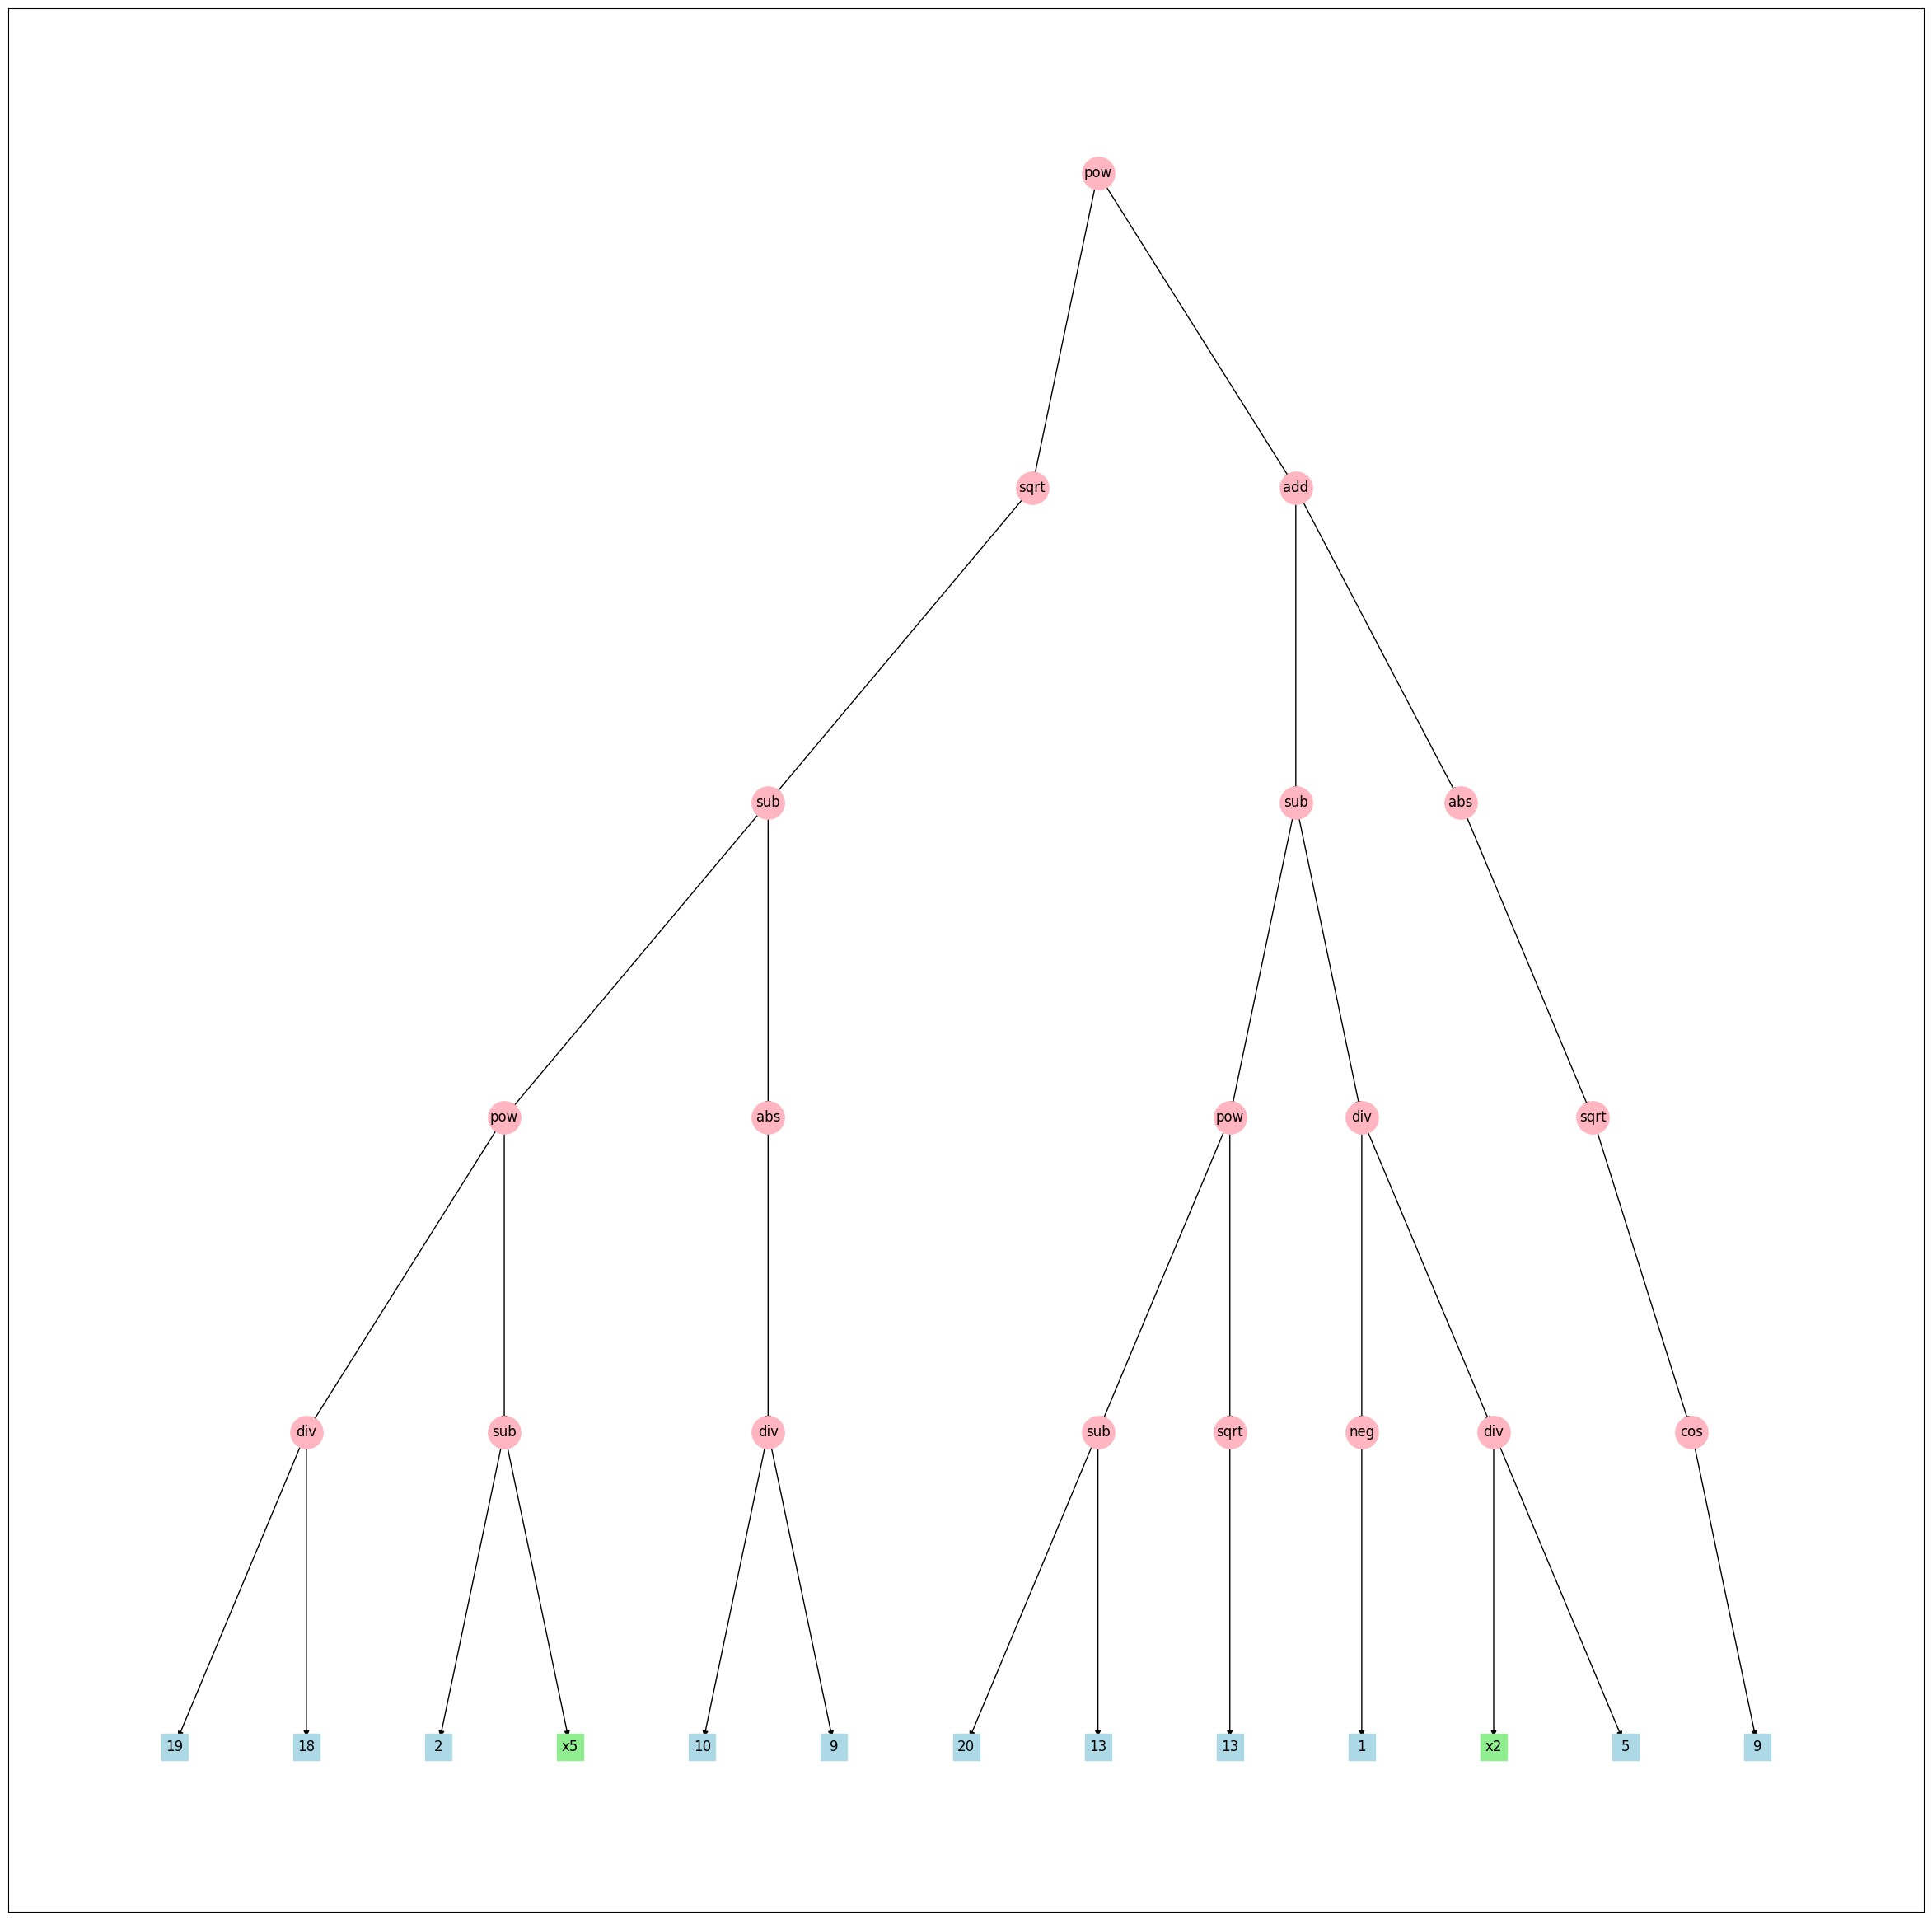

In [7]:
from utils.terminal_constants import crammed_constants

height = 5
initialized = generate_random_tree(height, 0.2, terminal_list, constants=crammed_constants, p_pick_constant=0.7, p_cut_tree=0.01, verbose=True)
initialized.draw()

Drawing tree with height 5...


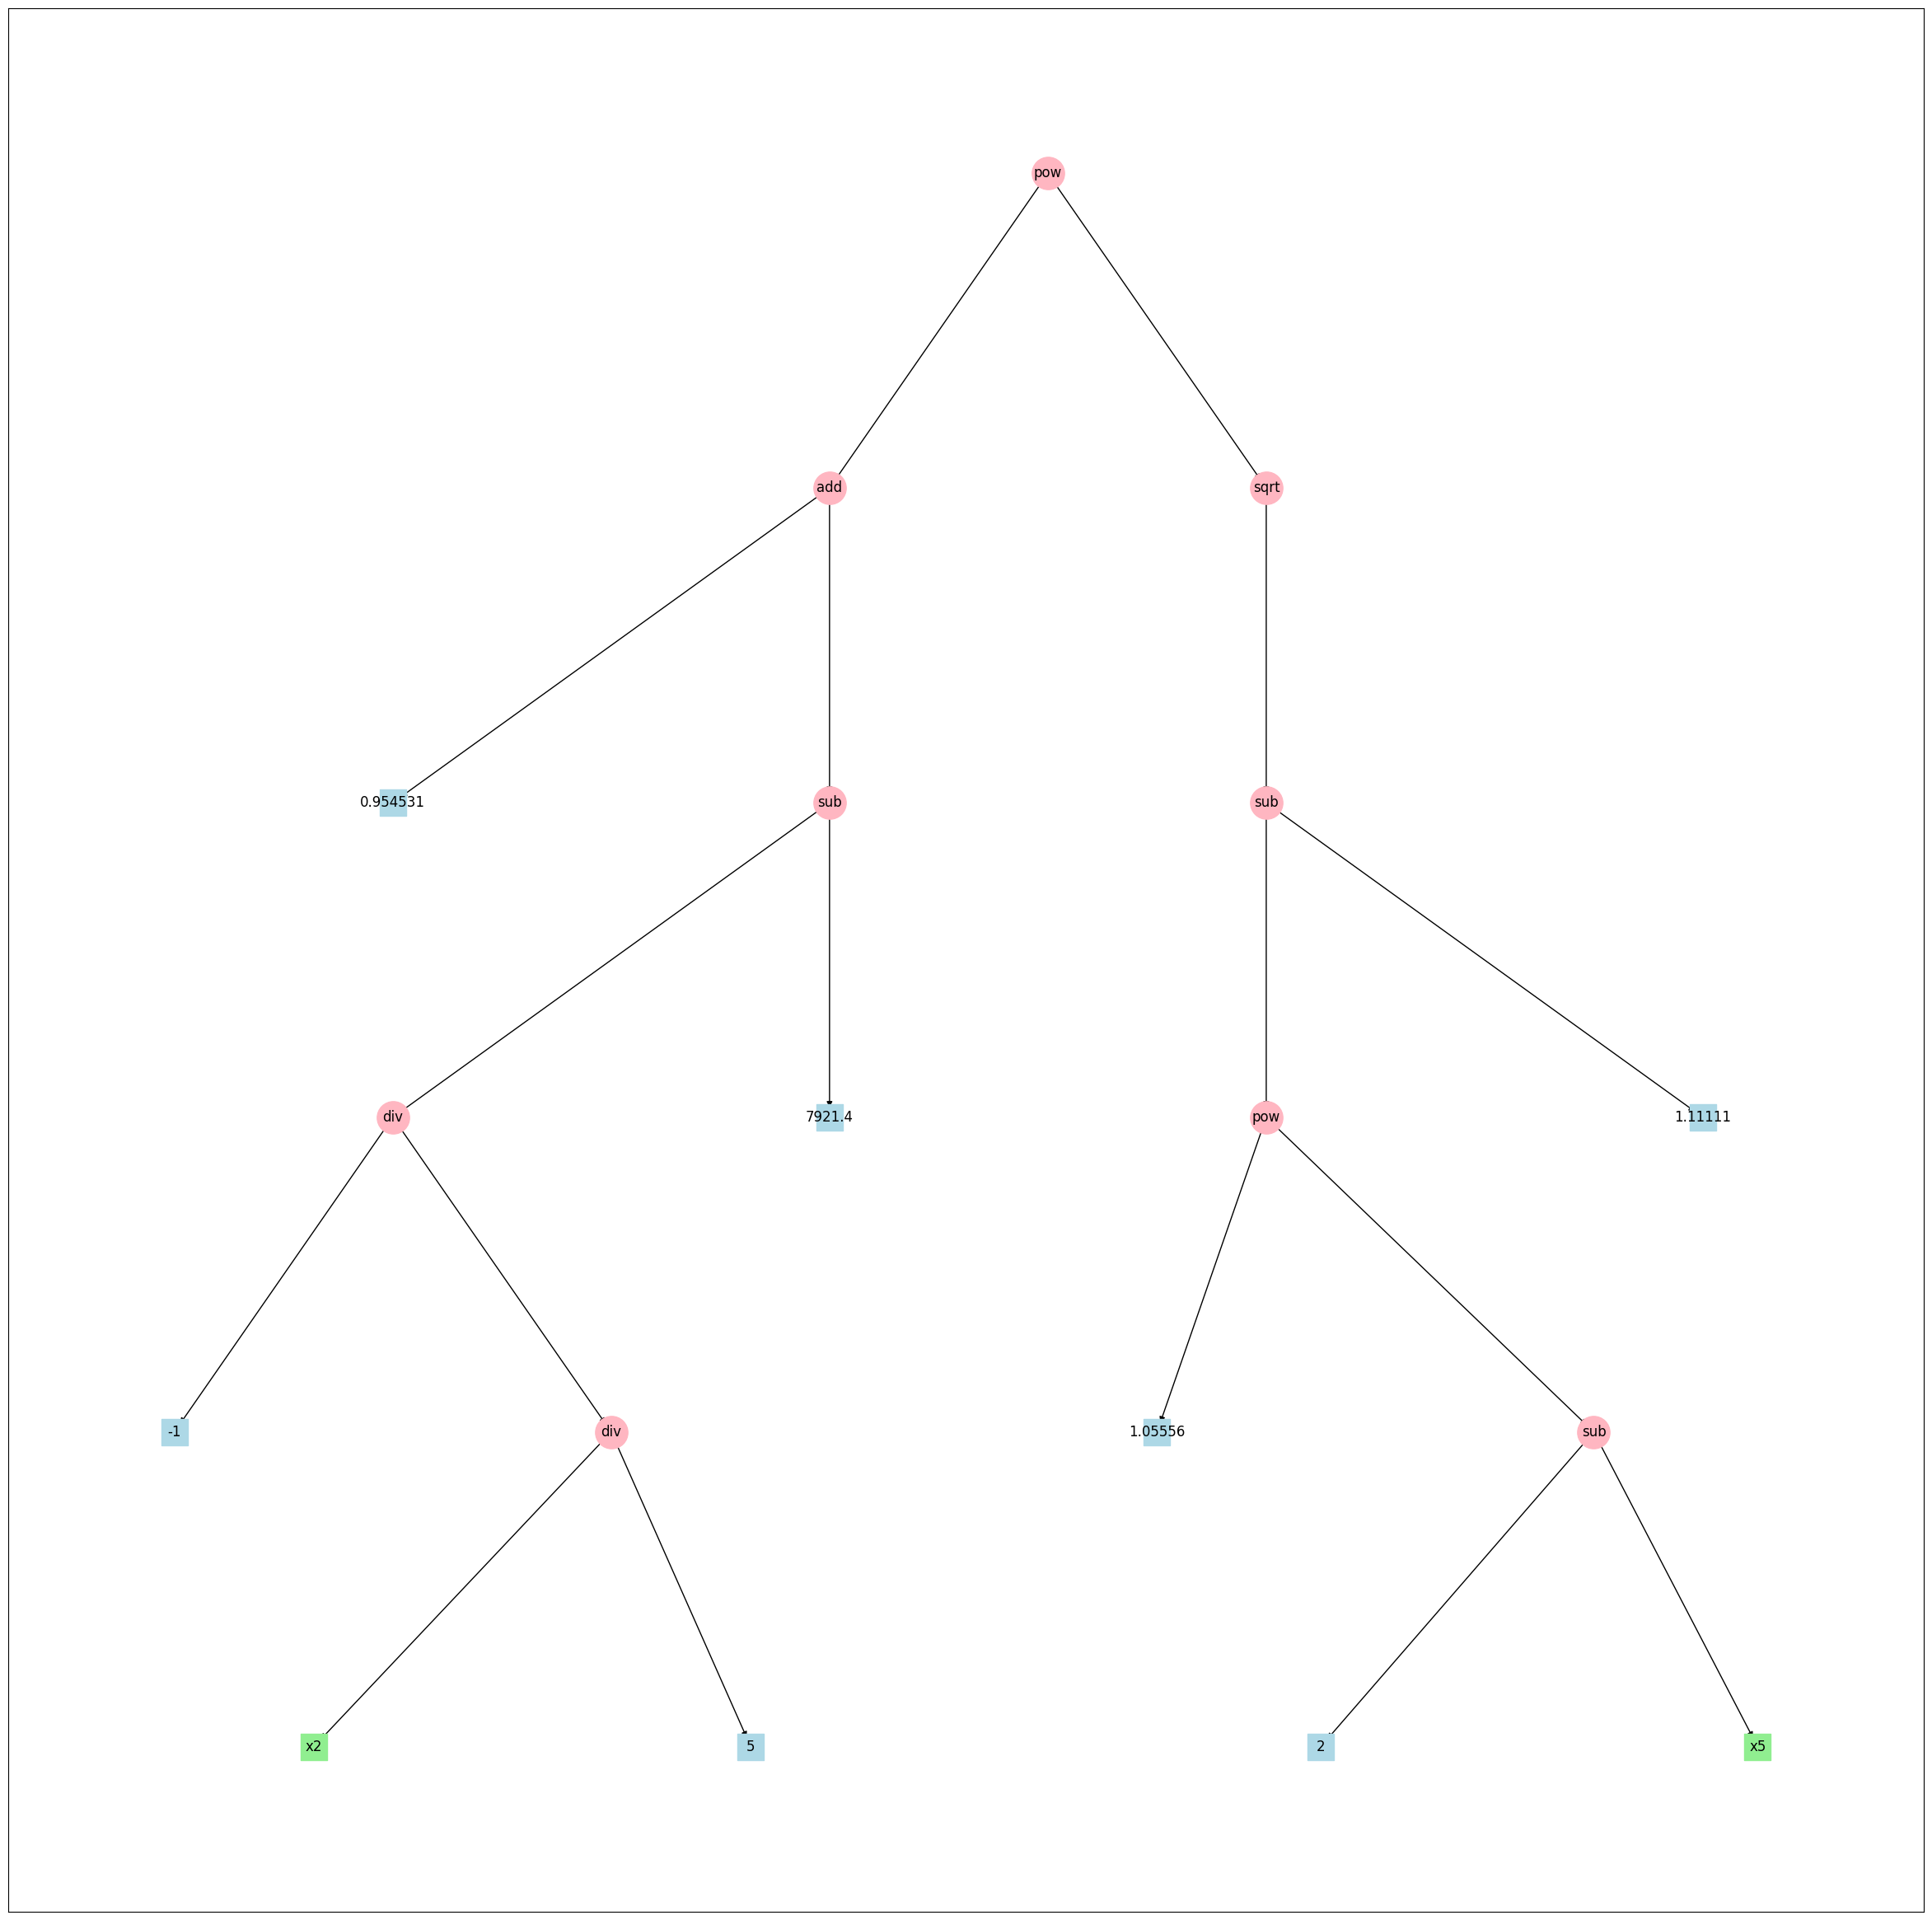

In [8]:
collapsed = initialized.collapse_constants()
collapsed.draw()

In [9]:
"""second=generate_random_tree(height, 0.2, terminal_list, constants=crammed_constants, p_pick_constant=0.4, p_cut_tree=0.05, verbose=True)
second.draw()"""

'second=generate_random_tree(height, 0.2, terminal_list, constants=crammed_constants, p_pick_constant=0.4, p_cut_tree=0.05, verbose=True)\nsecond.draw()'

In [10]:
"""for obj in recombination_crossover(initialized, second, verbose=True):
    obj.draw()"""

'for obj in recombination_crossover(initialized, second, verbose=True):\n    obj.draw()'

### Create input formatted

In [11]:
print("input shape is ", input.shape)

vars = []
for j in range(input.shape[1]):
    cur_vars = {'x'+str(i): input[i][j] for i in range(input.shape[0])}
    # print("cur_vars is ", cur_vars)
    vars.append(cur_vars)
vars = np.array(vars)

print("vars shape is ", vars.shape)

input shape is  (6, 50000)
vars shape is  (50000,)


### fitness

In [12]:
import warnings
warnings.simplefilter("error", RuntimeWarning)

In [13]:
# Fitness reverse
def fitness(mytree: Node, vars, labels, verbose=False, penalized = 'sqrt'):
    try:
        output = np.array([mytree(**var) for var in vars])
        mse = 100 * np.square(labels - output).mean()
        if penalized == 'percent':
            return mse +  mse * mytree.get_height() * 0.01 if mytree.get_height() > 0 else mse
        else:
            return mse * np.sqrt(mytree.get_height()) if mytree.get_height() > 0 else mse
    except RuntimeWarning as e:
        if verbose: print(f"caught runtime warning: {e}, setting fitness to inf")
        return np.inf

def fitness_unscaled(mytree: Node, vars, labels, verbose=False):
    try:
        output = np.array([mytree(**var) for var in vars])
        mse = 100 * np.square(labels - output).mean()
        return mse
    except RuntimeWarning as e:
        if verbose: print(f"caught runtime warning: {e}, setting fitness to inf")
        return np.inf
#print(fitness(initialized, vars, labels))

In [14]:
from gxgp.gp_common import xover_swap_subtree
"""# Xover
def xover(tree1, tree2):
    return xover_swap_subtree(tree1, tree2)

# initialized.subtree.pop().draw() # this procedure is really similar to get_random_node, except there we use a list and random.choice
hoist_mutation(initialized, verbose=True).draw()"""

'# Xover\ndef xover(tree1, tree2):\n    return xover_swap_subtree(tree1, tree2)\n\n# initialized.subtree.pop().draw() # this procedure is really similar to get_random_node, except there we use a list and random.choice\nhoist_mutation(initialized, verbose=True).draw()'

### parent selection

In [15]:

def parent_selection(population, pre_calculated_fitnesses=None, penalized = 'sqrt'):
    if pre_calculated_fitnesses is None:
        candidates = sorted(np.random.choice(population, 2), key=lambda e: fitness(e,vars,labels, penalized=penalized))
        return candidates[0]
    else:
        #Random index between 0 and population size
        index1 = np.random.randint(0, len(population))
        index2 = np.random.randint(0, len(population))
        candidates = [population[index1], population[index2]]
        if pre_calculated_fitnesses[index1] > pre_calculated_fitnesses[index2]:
            return candidates[1]
        else:
            return candidates[0]

### utils functions

In [16]:
import concurrent
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import numpy as np

def compute_pair_distance(i, j, population):
    return i, j, population[i].tree_distance(population[j])

def tree_distance(population, verbose="Calculating tree distance matrix"):
    n = len(population)
    matrix = np.zeros((n, n))
    pairs = [(i, j) for i in range(n) for j in range(i+1, n)]
    
    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(compute_pair_distance, i, j, population) for i, j in pairs]
        for future in tqdm(concurrent.futures.as_completed(futures), desc=verbose, total=len(futures)):
            i, j, dist = future.result()
            matrix[i][j] = dist/ population[i].__len__() if population[i].__len__() > 0 else dist
            matrix[j][i] = dist/ population[j].__len__() if population[j].__len__() > 0 else dist

    
    return matrix

def random_mutation(p1=0.16, p2=0.16, p3=0.16, p4=0.16, p5=0.16):
    r = random.random()
    if r < p1:
        return point_mutation
    elif r < p1 + p2:
        return subtree_mutation
    elif r < p1 + p2 + p3:
        return expansion_mutation
    elif r < p1 + p2 + p3 + p4:
        return permutation_mutation
    elif r < p1 + p2 + p3 + p4 + p5:
        return collaps_mutation
    else:
        return hoist_mutation


### Training

In [ ]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
import math


# Parameters
crossover = recombination_crossover
OFFSPRING_SIZE = 200
POPULATION_SIZE = 200
OUTSIDER_SIZE = math.ceil(OFFSPRING_SIZE*0.1)
pm = 0.05
x_elitism = 0.08
MAX_GENERATIONS = 100
HEIGHT = 5
PC = 0.1
P_PICK_CONSTANT = 0.4
P_CUT_TREE = 0.05


# Initialize the population
def initialize_population(_):
    return generate_random_tree_with_all_terminal(HEIGHT, PC, terminal_list, constants=crammed_constants, p_pick_constant=P_PICK_CONSTANT, p_cut_tree=P_CUT_TREE)

ALREADY_INITIALIZED = True
if not ALREADY_INITIALIZED:
    with ThreadPoolExecutor() as executor:
        population = list(tqdm(executor.map(initialize_population, range(POPULATION_SIZE)), desc="Initializing population", total=POPULATION_SIZE))

population = [tree.collapse_constants() for tree in population if tree is not None]    
# Remove identical trees
distance_matrix = tree_distance(population, verbose='Initial tree distances')
n = len(population)
# I need to keep only the first tree if there are identical trees
for i in range(n):
    for j in range(i + 1, n):
        if distance_matrix[i][j] == 0 and population[j] is not None:
            population[j] = None

population = [tree for tree in population if tree is not None]
for tree in population:
    tree.reeval_heights()

 # Evaluate the population
with ThreadPoolExecutor() as executor:
    fitnesses = np.array(list(tqdm(executor.map(lambda tree: fitness(tree, vars, labels, penalized='sqrt'), population), desc="Evaluating population", total=len(population))))
   
penalized = 'percent'
probabilities2 = [0.10, 0.10, 0.10, 0.10, 0.10]
probabilities1 = [0.16, 0.16, 0.16, 0.16, 0.16]

print(*probabilities1)

probabilities = probabilities1
# Training
for generation in range(MAX_GENERATIONS):
    if (generation >= 15):
        probabilities = probabilities2
        penalized = 'percent'
    if(generation >= 25):
        penalized = 'percent'
        probabilities = probabilities1

    pm = max(0.05, 0.2 - generation / MAX_GENERATIONS * 0.15)# from 0.2 to 0.05
    # Select the best individuals
    best_individuals = np.argsort(fitnesses)[:int(x_elitism * POPULATION_SIZE)]
    # Create the offspring
    offspring = []
    for _ in tqdm(range(OFFSPRING_SIZE), desc=f"Generation {generation}, Creating offsprings"):
        # Mutation
        if random.random() < pm:
            mutation = random_mutation(*probabilities)
            child = mutation(parent_selection(population, fitnesses).clone(), terminal_list, constants=crammed_constants, p_pick_constant=P_PICK_CONSTANT, pc=PC)
            child.reeval_heights()
            offspring.append(child)
        else:
            # Select parents
            parent1 = parent_selection(population, fitnesses, penalized).clone()
            parent2 = parent_selection(population, fitnesses, penalized).clone()
            # Crossover
            child1, child2 = crossover(parent1, parent2)
            child1.reeval_heights()
            child2.reeval_heights()
            offspring.extend([child1, child2])
    # Combine and select the best individuals
    population = [population[i] for i in best_individuals] + offspring

    # Remove identical trees
    population = [tree.collapse_constants() for tree in population if tree is not None]
    distance_matrix = tree_distance(population)
    n = len(population)
    # I need to keep only the first tree if there are identical trees
    for i in range(n):
        for j in range(i + 1, n):
            if distance_matrix[i][j] == 0 and population[j] is not None:
                population[j] = None
    
    # Sort population for summation of distance similarity
    summation = np.zeros(n)
    for i in range(n):
        summation[i] = np.sum(distance_matrix[i,:])
    
    distance_sorted = np.argsort(summation)[::-1]
    outsiders = set(distance_sorted[:OUTSIDER_SIZE])
    # Calculate fitness function
    with ThreadPoolExecutor() as executor:
        fitnesses_offspring = np.array(list(tqdm(executor.map(lambda tree: fitness(tree, vars, labels, penalized=penalized), offspring), desc="Evaluating offsprings", total=len(offspring))))

    # Select the best individuals and outsiders
    all_fitnesses = np.concatenate([fitnesses[best_individuals], fitnesses_offspring])
    best_fitnesses = set(np.argsort(all_fitnesses)[:POPULATION_SIZE])
    # Union between best individuals and outsiders
    union = best_fitnesses.union(outsiders)
    intersection = best_fitnesses.intersection(outsiders)

    union_filtered = [i for i in union if population[i] is not None]

    population = [population[i] for i in union_filtered]
    before = len(union)
    fitnesses = [all_fitnesses[i] for i in union_filtered]
    fitnesses = np.array(fitnesses)
    best_fitness = fitness_unscaled(population[0], vars, labels)
    print(f"Removed {before - len(population)} identical or invalid trees")
    print(f'Kept {len(outsiders) - len(intersection)} outsiders with low fitness')
    if generation > 0:
        print(f"Generation {generation} - Best fitness: {best_fitness} - Difference: {best_fitness - old_best_fitness}")
    else:
        print(f"Generation {generation} - Best fitness: {best_fitness}")
    old_best_fitness = best_fitness
    print(f"Population size: {len(population)}")
    print(f'Best height: {population[0].get_height()}')
    print(f"Mean height of the population: {np.mean([tree.get_height() for tree in population])}")


Evaluating population: 100%|██████████| 354/354 [18:18<00:00,  3.10s/it]  


0.16 0.16 0.16 0.16 0.16


Evaluating offsprings: 100%|██████████| 356/356 [17:59<00:00,  3.03s/it]  


Removed 9 identical or invalid trees
Kept 20 outsiders with low fitness
Generation 0 - Best fitness: 79247863.38621886
Population size: 211
Best height: 12
Mean height of the population: 10.175355450236967


Evaluating offsprings:  56%|█████▌    | 203/362 [11:42<03:12,  1.21s/it]  

In [ ]:
from datetime import datetime
conf = {
    "problem": problem_number,
    "crossover": crossover,
    "OFFSPRING_SIZE": OFFSPRING_SIZE,
    "POPULATION_SIZE": POPULATION_SIZE,
    "OUTSIDER_SIZE": OUTSIDER_SIZE,
    "pm": pm,
    "x_elitism": x_elitism,
    "MAX_GENERATIONS": MAX_GENERATIONS,
    "HEIGHT": HEIGHT,
    "PC": PC,
    "P_PICK_CONSTANT": P_PICK_CONSTANT,
    "P_CUT_TREE": P_CUT_TREE
}
def save_results(conf, res_function, res_fitness):
    cur_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    with open(f"./results/{cur_time}.txt", "w") as file:
        # Write the contents of conf
        file.write("# Configuration\n")
        file.write("conf = {\n")
        for key, value in conf.items():
            file.write(f"    '{key}': {value},\n")
        file.write("}\n\n")
        
        # Write the contents of res_function
        file.write("# Resulting function\n")
        file.write(f"{res_function}")
        
        # Write the contents of res_fitness
        file.write("# Resulting fitness\n")
        file.write(f"{res_fitness}")
save_results(conf, str(population[0]), best_fitness)

In [ ]:
population[0].draw()
print(fitness(population[0], vars, labels))